# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [4]:
# Generate the blobs dataset
X, y = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)

# Print the shape of X and y
print("Shape of X:", X.shape)  # Expected: (1200, 8)
print("Shape of y:", y.shape)  # Expected: (1200,)

Shape of X: (1200, 8)
Shape of y: (1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

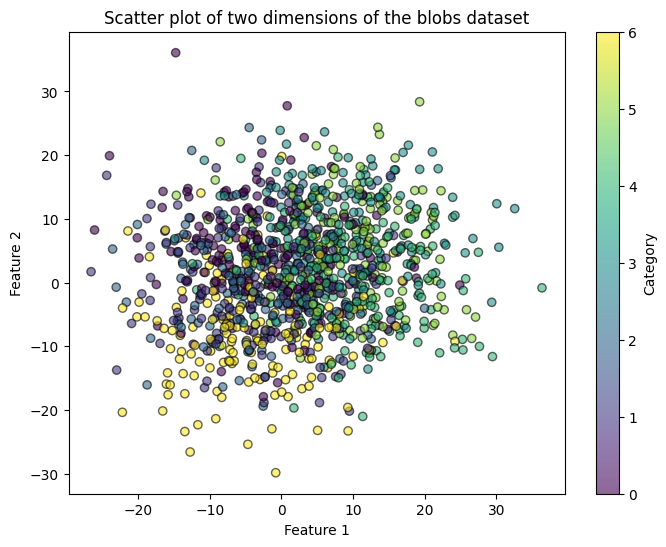

In [5]:
# Scatter plot of two arbitrary dimensions (e.g., first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of two dimensions of the blobs dataset")
plt.colorbar(label="Category")
plt.show()

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

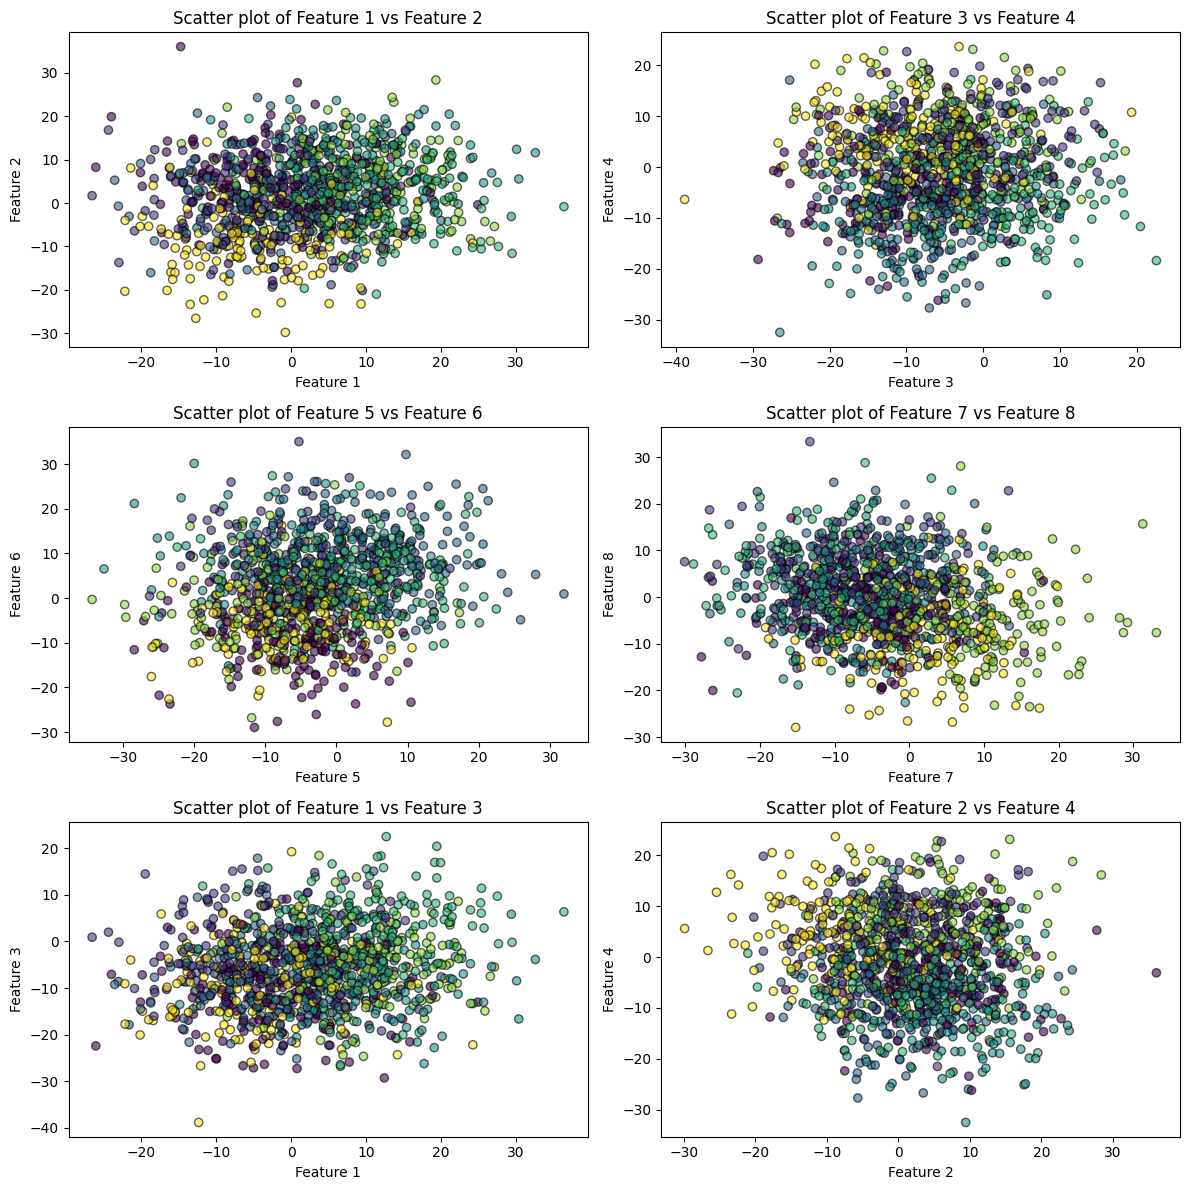

In [6]:
# Scatter plot of multiple pairs of dimensions
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
dim_pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (0, 2), (1, 3)]

for ax, (i, j) in zip(axes.flatten(), dim_pairs):
    ax.scatter(X[:, i], X[:, j], c=y, cmap='viridis', alpha=0.6, edgecolors='k')
    ax.set_xlabel(f"Feature {i+1}")
    ax.set_ylabel(f"Feature {j+1}")
    ax.set_title(f"Scatter plot of Feature {i+1} vs Feature {j+1}")

plt.tight_layout()
plt.show()

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [9]:
# Encode categorical target
y_cat = to_categorical(y)
print("y after encoding:", y_cat[:10])  # Print first 10 encoded values

y after encoding: [[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [11]:
# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=1)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [13]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(840, 8)

In [16]:
y_train.shape

(840, 7)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [32]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8))
    model.add(layers.Dense(7, activation='softmax'))
    
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [33]:
model.count_params()

807

❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [34]:
history = model.fit(X_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 2ms/step - loss: 1.9031 - accuracy: 0.2179
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 1.8003 - accuracy: 0.2905
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 1.7083 - accuracy: 0.3536
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 1.6235 - accuracy: 0.4000
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 1.5447 - accuracy: 0.4464
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 1.4724 - accuracy: 0.5119
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 1.4050 - accuracy: 0.5643
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 1.3432 - accuracy: 0.6048
Epoch 9/50
9/9 [==============================] - 0s 3ms/step - loss: 1.2867 - accuracy: 0.6214
Epoch 10/50
9/9 [==============================] - 0s 5ms/step - loss: 1.2348 - accuracy: 0.6369
Epoch 11/50
9/9 [======================

In [35]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

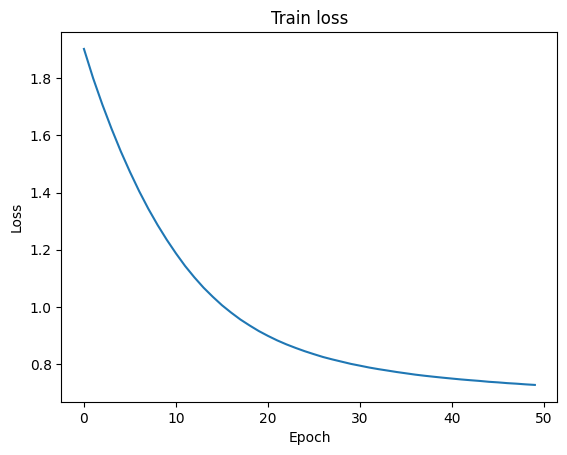

In [36]:
plot_history(history)

In [ ]:
history

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [37]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

12/12 [==============================] - 0s 3ms/step - loss: 0.9163 - accuracy: 0.6861
Test Loss: 0.9163
Test Accuracy: 0.6861


❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

(No need to code for this, just think about how our dataset was created in the first place.)

In [49]:
accuracy_baseline = 1 / 7

🧪 **Test your code**

In [50]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/mahshid/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/mahshid/code/mahshid90/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/data-multiclass-classification/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [40]:
history = model.fit(X_train, y_train, batch_size=100, epochs=1000)

Epoch 1/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7246 - accuracy: 0.7298
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.7226 - accuracy: 0.7286
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7211 - accuracy: 0.7298
Epoch 4/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.7310
Epoch 5/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.7310
Epoch 6/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7159 - accuracy: 0.7310
Epoch 7/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.7298
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7127 - accuracy: 0.7310
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.7298
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.7274
Epoch 11/1000
9/9 [

9/9 [==============================] - 0s 2ms/step - loss: 0.6402 - accuracy: 0.7524
Epoch 84/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7524
Epoch 85/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.7548
Epoch 86/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.7548
Epoch 87/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.7548
Epoch 88/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.7560
Epoch 89/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.7571
Epoch 90/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.7560
Epoch 91/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.7560
Epoch 92/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.7583
Epoch 93/1000
9/9 [=====

9/9 [==============================] - 0s 5ms/step - loss: 0.5893 - accuracy: 0.7821
Epoch 166/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.7810
Epoch 167/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.7845
Epoch 168/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5875 - accuracy: 0.7810
Epoch 169/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.7798
Epoch 170/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7821
Epoch 171/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7833
Epoch 172/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.5859 - accuracy: 0.7821
Epoch 173/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.5854 - accuracy: 0.7810
Epoch 174/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.7786
Epoch 175/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.7964
Epoch 248/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7988
Epoch 249/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5530 - accuracy: 0.7964
Epoch 250/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.7940
Epoch 251/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.7929
Epoch 252/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7952
Epoch 253/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.8012
Epoch 254/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.8000
Epoch 255/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7976
Epoch 256/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.8000
Epoch 257/1000


9/9 [==============================] - 0s 5ms/step - loss: 0.5259 - accuracy: 0.8107
Epoch 330/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.8083
Epoch 331/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5257 - accuracy: 0.8083
Epoch 332/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8083
Epoch 333/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.8083
Epoch 334/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8071
Epoch 335/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.8119
Epoch 336/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.8119
Epoch 337/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.8071
Epoch 338/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5231 - accuracy: 0.8095
Epoch 339/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.8119
Epoch 412/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.8107
Epoch 413/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8119
Epoch 414/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.8131
Epoch 415/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 0.8095
Epoch 416/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.8095
Epoch 417/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.8107
Epoch 418/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.8119
Epoch 419/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.8131
Epoch 420/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.8143
Epoch 421/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.8167
Epoch 494/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.8202
Epoch 495/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.8179
Epoch 496/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.8226
Epoch 497/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.8167
Epoch 498/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.8179
Epoch 499/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8179
Epoch 500/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.8143
Epoch 501/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.8179
Epoch 502/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.8202
Epoch 503/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.8274
Epoch 576/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8321
Epoch 577/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8333
Epoch 578/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8345
Epoch 579/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.8298
Epoch 580/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8262
Epoch 581/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.8274
Epoch 582/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.8202
Epoch 583/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8226
Epoch 584/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8190
Epoch 585/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8405
Epoch 658/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8417
Epoch 659/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8345
Epoch 660/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8405
Epoch 661/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.8429
Epoch 662/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8440
Epoch 663/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8429
Epoch 664/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8357
Epoch 665/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8345
Epoch 666/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8405
Epoch 667/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8429
Epoch 740/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8417
Epoch 741/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8440
Epoch 742/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8440
Epoch 743/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8440
Epoch 744/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8452
Epoch 745/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8452
Epoch 746/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8488
Epoch 747/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8476
Epoch 748/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8488
Epoch 749/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8536
Epoch 822/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8524
Epoch 823/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8512
Epoch 824/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8536
Epoch 825/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8560
Epoch 826/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8548
Epoch 827/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8583
Epoch 828/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8571
Epoch 829/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8583
Epoch 830/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8583
Epoch 831/1000


9/9 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8690
Epoch 904/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8690
Epoch 905/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8679
Epoch 906/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8714
Epoch 907/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8702
Epoch 908/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8655
Epoch 909/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8690
Epoch 910/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8738
Epoch 911/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3719 - accuracy: 0.8714
Epoch 912/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8714
Epoch 913/1000


9/9 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.8762
Epoch 986/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8750
Epoch 987/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8750
Epoch 988/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8750
Epoch 989/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8786
Epoch 990/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8774
Epoch 991/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8798
Epoch 992/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8762
Epoch 993/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8738
Epoch 994/1000
9/9 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8738
Epoch 995/1000


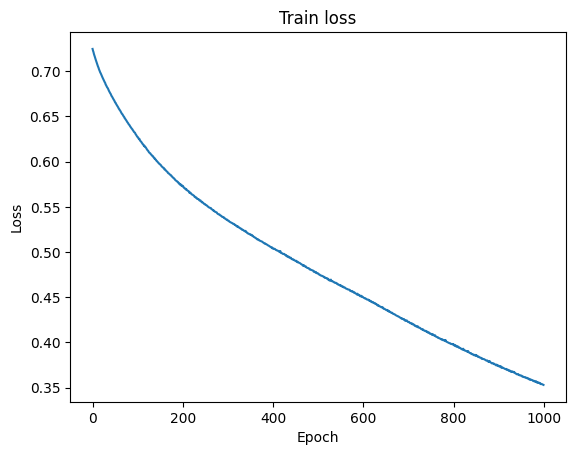

In [44]:
plot_history(history)

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

12/12 [==============================] - 0s 2ms/step - loss: 1.8757 - accuracy: 0.6000
Test Loss: 1.8757
Test Accuracy: 0.6000


* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

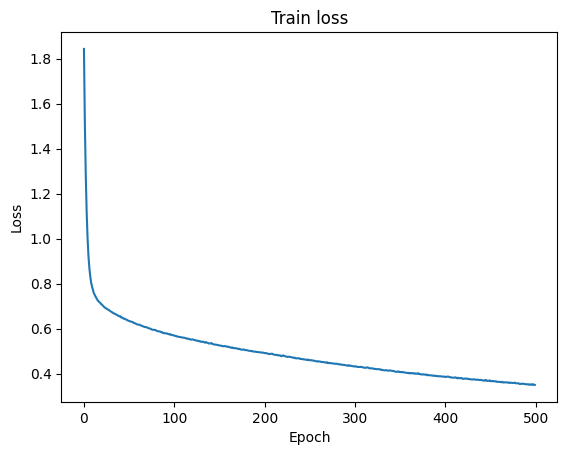

In [46]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [47]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [ ]:
# YOUR CODE HERE

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!